In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dropout,Activation
from keras.datasets import mnist 
from keras.optimizers import Adam,SGD,RMSprop
from keras.utils import np_utils
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("c:/Users/HP/Desktop/mnist/", one_hot=True)

In [4]:
f = np.load('d://mnist.npz')
print(type(f))
print(f.files)

<class 'numpy.lib.npyio.NpzFile'>
['x_test', 'x_train', 'y_train', 'y_test']


In [5]:
for i in f.files:
    print(i,f[i].shape,type(f[i]))

x_test (10000, 28, 28) <class 'numpy.ndarray'>
x_train (60000, 28, 28) <class 'numpy.ndarray'>
y_train (60000,) <class 'numpy.ndarray'>
y_test (10000,) <class 'numpy.ndarray'>


In [6]:
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']

In [7]:
y_test.shape

(10000,)

In [8]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)


In [9]:
x_train = x_train.astype('float32')
x_test =  x_test.astype('float32')


In [10]:
x_train = x_train/255 
x_test = x_test/255


In [11]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [16]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [13]:
plt.ion()

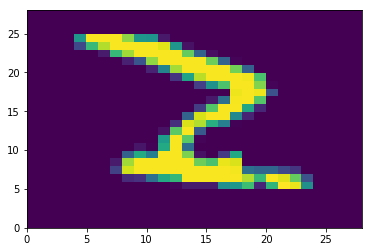

In [14]:
plt.pcolor(x_train[0].reshape(28,28))


In [ ]:
y_train

In [ ]:
y_test

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_train

In [ ]:
y_train[0]

In [ ]:
y_test = np_utils.to_categorical(y_test)
y_test

In [ ]:
y_test[0]

In [ ]:
print(y_test[:])

In [ ]:
y_test[0]

In [ ]:
model = Sequential()

In [ ]:
from keras.layers.core import Dense,Dropout,Activation

In [ ]:
model.add(Dense(128,input_shape = (784,)))

In [ ]:
model.add(Activation ('sigmoid'))

In [ ]:
model.add(Dense(10))

In [ ]:
model.layers

In [ ]:
model.summary()

Here in layer one number of parameters are 100480, how this is formed?
we have 784 pixels which is 28*28 for a single image and we have defined total 128 neurons so it is 784*128 and since there are 128 neaurons so we will have 128 biases also, so it will be 784*128+128 which is h = wx+b eqaution and 16512 is like 128*128+128 and 1290 is like 128*10+10 where 10 is second Dense layer neurons.

In [ ]:
model.add(Activation('softmax'))

we can have any optimizer like adagradient and stoachstic gradient optimizer, i used sgd here,you can try other also.

In [ ]:
sgd = SGD()

In [ ]:
model.compile(optimizer=sgd,loss='categorical_crossentropy')

In [ ]:
model.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=1)

In the above process we can lot of things, we set rpoch as 50 so 50 times it will prcoess the samples, how many samples 60000 you can left hand side 60000/60000 and you can see each epoch took how many seconds and loss is how much it differs from actual values that 100-accuracy = loss

In [ ]:
score = model.evaluate(x_test,y_test,verbose=1,batch_size=128)
score


In [ ]:
a = model.get_weights()

In [ ]:
len(a)

we passed input values 784 pixels and neurons are 128 in layer1 after softmax activation function the number of weights are 10 which is in dense layer2 as you can see below the required classes are 10 and we have correpsonding weights here.

In [ ]:
for i in range(len(a)):
    print(len(a[i]))
    

In [ ]:
model.summary()

we can save model weights and total model also if we want, this helps in reducing the training time again if we want to train in future for same kind of data.

In [ ]:
model.save_weights('weights of MNIST DATA',overwrite=False)

In [ ]:
model.save('model of MNIST DATA')

In [ ]:
model.get_weights()

In [ ]:
len(model.get_weights())

In [ ]:
len(model.get_weights()[0])

In [ ]:
len(model.get_weights()[1])

In [ ]:
len(model.get_weights()[2])

In [ ]:
len(model.get_weights()[3])

In [ ]:
model.summary()

we can predict the classes for a given data

In [ ]:
model.predict_classes(x_test,batch_size=32)

we can estimate / predict what is the probablity of a class for a given data

In [ ]:
model.predict_proba(x_test)